## Sampling and Reconstruction of Signals: Analysis of Aliasing Effects and Proper Signal Reconstruction
### Mikołaj Zuziak, Variant 9

1. Reconstruct a cosine wave with f = 15 Hz, sampled at fs = 25 Hz
2. Transform-Based Compression: Apply DCT to the signal [12, 24, 36, 48, 60, 72] and
reconstruct it with a threshold of 10

### Reconstruct a cosine wave with f = 15 Hz, sampled at fs = 25 Hz

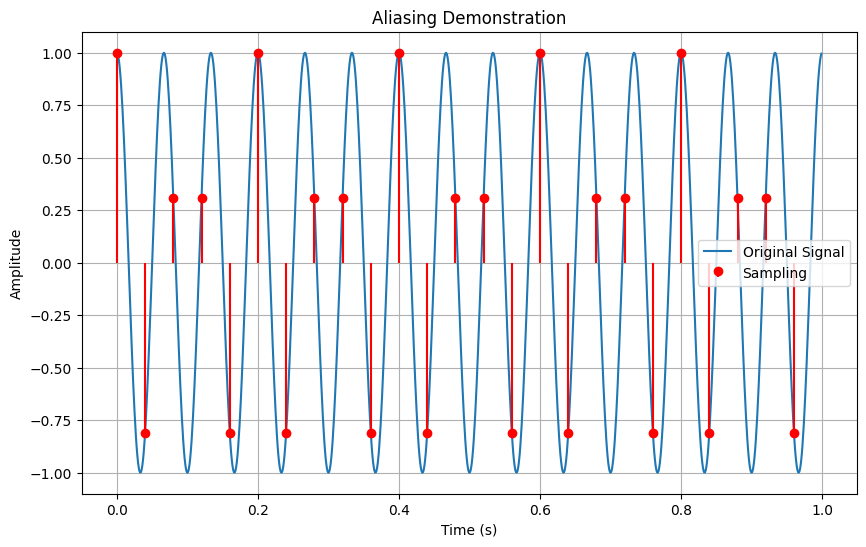

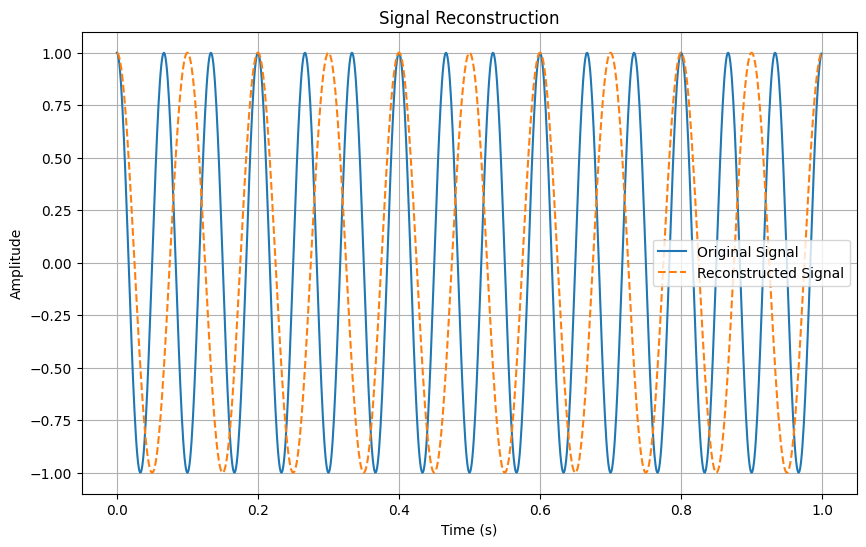

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

def reconstruct(fs):
    # Original signal parameters
    f_signal = 15  # Frequency of the signal (Hz)
    t_high_res = np.linspace(0, 1, 1000, endpoint=False)  # High resolution time vector
    signal = np.cos(2 * np.pi * f_signal * t_high_res)  # Original signal

    # Sampling the signal
    t = np.arange(0, 1, 1 / fs)
    samples = np.cos(2 * np.pi * f_signal * t)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t_high_res, signal, label='Original Signal')
    plt.stem(t, samples, linefmt='r-', markerfmt='ro', basefmt=" ", label='Sampling')
    plt.title('Aliasing Demonstration')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()
    # Reconstructing the signal using high sampling rate
    num_samples = 1000
    reconstructed_signal = resample(samples, num_samples)

    # Plotting the reconstruction
    plt.figure(figsize=(10, 6))
    plt.plot(t_high_res, signal, label='Original Signal')
    plt.plot(t_high_res, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
    plt.title('Signal Reconstruction')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

# Sampling parameters
fs1 = 25  # Sampling frequency (Hz)
reconstruct(fs1)  # Reconstruct the signal


Observation: The reconstructed signal does not align with the original signal because the specified sampling rate (25 Hz) does not satisfy the Nyquist criterion. Since the signal frequency is 15 Hz, the sampling rate must be at least 30 Hz to achieve accurate reconstruction.

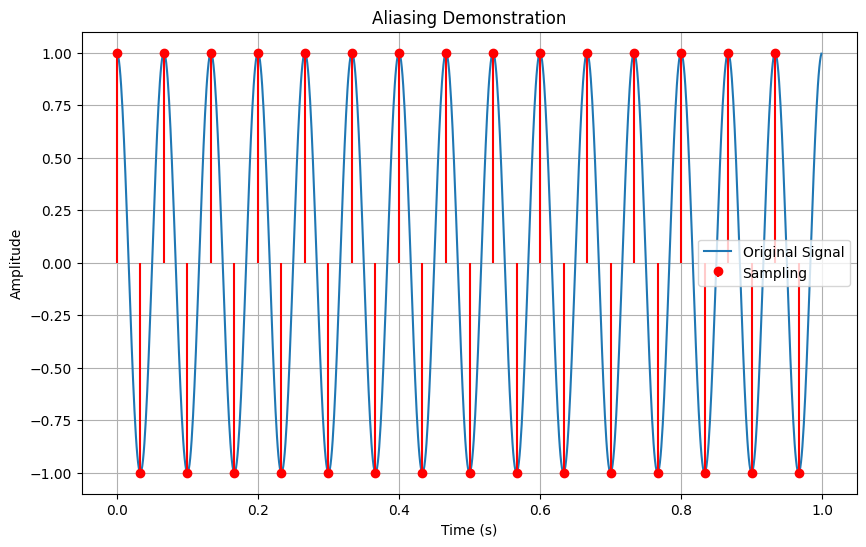

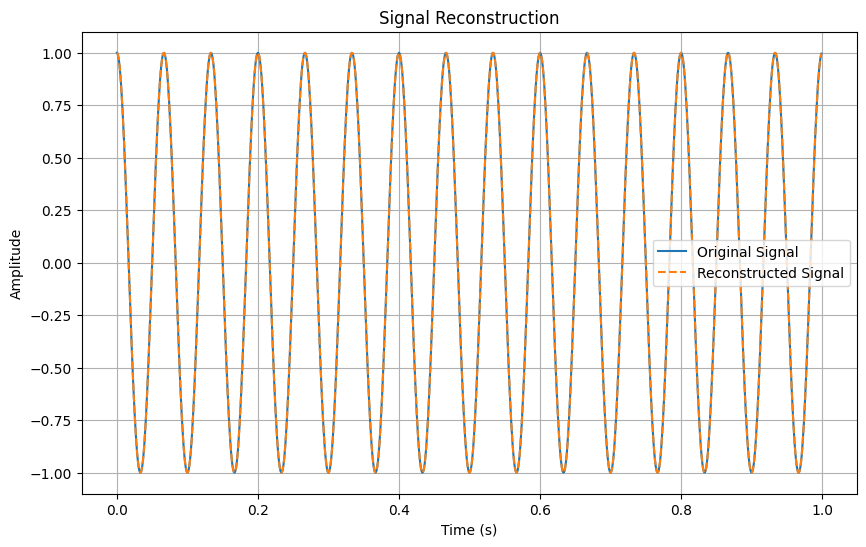

In [19]:
# Version that corectly reconstructs the signal
fs2 = 30  # Sampling frequency (Hz) meets the Nyquist criterion
reconstruct(fs2)  # Reconstruct the signal

### Transform-Based Compression: Apply DCT to the signal [12, 24, 36, 48, 60, 72] and reconstruct it with a threshold of 10

In [27]:
from scipy.fftpack import dct, idct

# Apply Discrete Cosine Transform (DCT)
def apply_dct(signal):
    return dct(signal, norm='ortho')

# Reconstruct signal using inverse DCT
def reconstruct_signal(dct_signal, threshold):
    dct_compressed = dct_signal.copy()  # Create a copy to avoid modifying original DCT coefficients
    dct_compressed[np.abs(dct_compressed) < threshold] = 0
    return idct(dct_compressed, norm='ortho')

original_signal = np.array([12, 24, 36, 48, 60, 72])
dct_signal = apply_dct(original_signal)
reconstructed_signal = reconstruct_signal(dct_signal, threshold=10)

print("Original Signal:", original_signal)
print("Compressed Signal:", dct_signal)
print("Reconstructed Signal:", np.round(reconstructed_signal, 2))

Original Signal: [12 24 36 48 60 72]
Compressed Signal: [102.8785692  -49.95074155   0.          -4.89897949   0.
  -0.96094669]
Reconstructed Signal: [14.14 21.61 34.54 49.46 62.39 69.86]
